In [1]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty.aws
compthink
/opt/conda/envs/python/bin/python
3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 16 Mar 2021

## Lesson 18 : Interval Estimates (Confidence and Prediction Intervals)

A procedure to quantify the probability of an estimate being representative of an equivalent population value

<!--![](https://www.thermofisher.com/blog/wp-content/uploads/sites/11/2018/01/istock-829172394_redumbrella.jpg)-->

## Objectives
- To apply fundamental concepts involved in probability estimation modeling and descriptive statistics;
  - Is a descriptive statistic a good estimate of its population value?
  - What is the best estimate of a statistic from a set, and its likely range?
  - 
---

## Computational Thinking Concepts
The CT concepts include:

- Abstraction => Represent data behavior with a statistic 
- Pattern Recognition => Compare patterns in (our) data models to make a decision
---

# Textbook Resources

[https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

You know the URL that no-one reads, perhaps because there is a "secret" module you need to install, without instructions of how! 

<hr>

Much of what follows below is borrowed with some changes for our class from: https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf



Much of what follows below is borrowed with some changes for our class from: https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf

## Interval Estimates

Several summary statistics were presented that described key attributes of a dataset, including sample estimates such as $\bar x$ and $s^2$, of true and unknown population parameters, such as $\mu$, the population mean, and $\sigma^2$, the population variance.

What follows are methods to describe the uncertainty or reliability of sample estimates. As an alternative to reporting a single estimate, the utility of reporting a range of values called an interval estimate is demonstrated. Both parametric and nonparametric interval estimates are presented. These intervals can also be used to test whether the population parameter is significantly different from some prespecified value.

### Definition of Interval Estimates

The sample median and sample mean are two types of estimates of the central tendency of a population. Such estimates are called point estimates. By themselves, point estimates do not portray the reliability, or lack of reliability (variability), of these estimates. For example, suppose that two datasets—X and Y—exist, both have a sample mean of about 50 and contain the same number of observations.

                X           Y
count  500.000000  500.000000
mean    52.962000   50.708000
std     28.531959    5.710688
min      1.000000   41.000000
25%     31.000000   46.000000
50%     53.000000   50.000000
75%     76.000000   56.000000
max    100.000000   60.000000


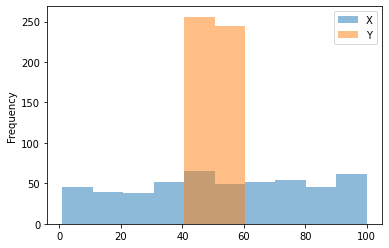

In [10]:
import numpy
import pandas
process1 = []
process2 = []
for i in range(1,101,1):
    process1.append(i)
for i in range(41,61,1):
    process2.append(i)
    
x = numpy.random.choice(process1,500)
y = numpy.random.choice(process2,500)

# make lists into dataframe 
boxdf = pandas.DataFrame()
boxdf['X']=x
boxdf['Y']=y

# describe lists/dataframe 
print(boxdf.describe())

boxdf.plot.hist(alpha=0.5); # 



The Y data all cluster tightly around 50; the X data are much more variable. The point estimate of 50 for dataset X is less certain than the point estimate for dataset Y because of the greater variability in the X data. Reporting only the sample (point) estimate of 50 fails to give any hint of this difference, although it is graphically quite evident.

We would then recall we have been hypothesis testing the crap out of things, so we can apply those tools:


# Interval Estimates (Continued)

The prior lesson introduced interval estimates, here we will go through some useful estimate methods/examples largely borrowed from https://pubs.usgs.gov/tm/04/a03/tm4a3.pdf

## Confidence Intervals for the Median
A confidence interval for the true population median may be computed in two ways: (1) without assuming the data follow any specific distribution (nonparametric), or (2) assuming they follow a distribution such as the lognormal (parametric).

### Nonparametric Interval Estimate for the Median

We will consider two nonparametric approaches to interval estimates for the median. The first is based on the binomial distribution and the second is a bootstrap method, which is a general approach to many estimation problems. Neither approach requires assumptions about the distribution of the random variable.

For the binomial approach we start by selecting the desired significance level α, which is the acceptable risk of not including the true median. One-half of this risk (α/2) is assigned to each end of the interval. 
To compute the confidence interval for the median we use the cumulative distribution function (cdf) of the binomial distribution. Learn about the cdf at https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

Here's a way to learn, lets code up a script to plot the CDF, and see if it looks like a CDF, in this case we will plot the accumulated probability on the x-axis, and the random variable value on the y-axis.

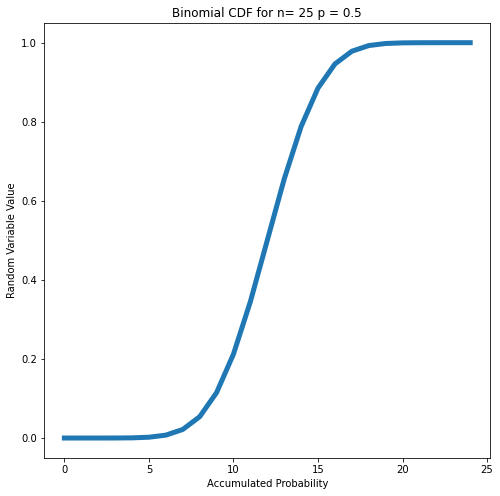

In [1]:
import numpy
import pandas
import scipy.stats 
import matplotlib.pyplot

n = 25
p = 0.5
prob = []
xval = []
for rv in range(0,n):
    x=float(rv)
    prob.append(scipy.stats.binom.cdf(x, n, p))
    xval.append(x)

matplotlib.pyplot.figure(figsize=(8,8))
matplotlib.pyplot.plot(xval, prob,  lw=5)
plottitle = 'Binomial CDF for n= ' + str(round(n,3))+ ' p = ' + str(round(p,3))
matplotlib.pyplot.title(plottitle)
matplotlib.pyplot.xlabel('Accumulated Probability')
matplotlib.pyplot.ylabel('Random Variable Value')
matplotlib.pyplot.show()

To determine the 100 · (1 − α)-percent confidence interval we use the binomial distribution function to determine the critical values of the ranks of the dataset that correspond to α/2 and 1 − (α/2) points on the binomial cumulative distribution function. These critical values of the ranks are then associated with their data values to form the upper and lower confidence limits for the median. 

We then use the binomial distribution to answer the following question: How likely is it that the true population median, $c_{0.5}$, would be such that k of the n observed data would be above $c_{0.5}$ and n−k below $c_{0.5}$, where for example, k could be 0, 1, 2, 3,…, 25 out of n = 25? 
The binomial distribution with prob = 0.5 is used because the probability of being above the population median is 0.5. The resulting confidence interval will reflect the shape (skewed or symmetric) of the original data. 

Nonparametric intervals cannot exactly produce the desired confidence level when the sample sizes are small. This is because the possible values are discrete, jumping from one data value to the next at the ends of the intervals. However, confidence intervals close to those desired are available for all but the smallest sample sizes. The process of computing the confidence interval is best illustrated with an example.

25 arsenic concentrations were reported for groundwaters of southeastern New Hampshire (Boudette and others, 1985). A boxplot of the data is shown. 
Compute the α = 0.05 interval estimate of the median concentration.

In [2]:
arsenic_list = [1.3, 1.5, 1.8, 2.6, 2.8, 3.5, 4.0, 4.8, 8, 9.5, 12, 14, 19, 23, 41, 80, 100, 110, 120, 190, 240, 250, 300, 340, 580]

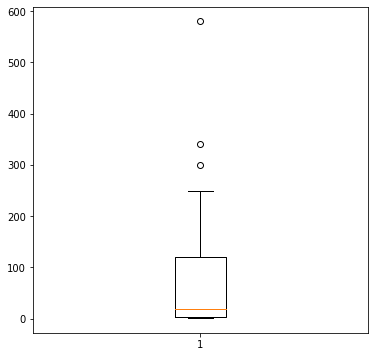

In [3]:
matplotlib.pyplot.figure(figsize=(6,6))
#matplotlib.pyplot.bar(arsenic_list,height=2.0)
matplotlib.pyplot.boxplot(arsenic_list)
matplotlib.pyplot.show()

The sample median $\hat{c}_{0.5} = 19$, which is the 13th observation ranked from smallest to largest in this sample size of 25. The binomial distribution is used to determine the 95-percent confidence interval for the true median concentration, $c_{0.5}$.

In [4]:
print('sample median value = ',numpy.percentile(arsenic_list,50.0) )# median value using percentile function
arsenic_list = numpy.sort(arsenic_list)
index_value=13
print('\nElement',index_value,' of the sorted list is ',arsenic_list[index_value-1])

sample median value =  19.0

Element 13  of the sorted list is  19.0


The binomial distribution is used to determine the 95-percent confidence interval for the true median concentration, $c_{0.5}$. We obtain the critical values from the cumulative binomial distribution function by creating a list of binomial values of correct length that represents the index values, then pull from the sample actual values.

In [5]:
n=len(arsenic_list)
p=0.5 # median is at 50%
prob = []
rank = []
for rv in range(0,n):
    x=float(rv)
    prob.append(scipy.stats.binom.cdf(x, n, p))
    rank.append(x)
    
for rv in range(0,n):
    if prob[rv]>0.05 :
        lower = arsenic_list[rv-1]
        rlo = rank[rv-1]
        break
        
for rv in range(0,n):
    if prob[rv]>0.95 :
        upper = arsenic_list[rv-1]
        rup = rank[rv-1]
        break

print('Estimate of median is ',numpy.percentile(arsenic_list,50.0))
print('Approximate 95% confidence interval estimate is the median is located between ',lower,'and', upper)

print('Actual interval probability = ',100*round(scipy.stats.binom.cdf(rup, n, p) - scipy.stats.binom.cdf(rlo, n, p),3),' %')
#print(arsenic_list[rlo-1])
#print(arsenic_list[rup+1])

Estimate of median is  19.0
Approximate 95% confidence interval estimate is the median is located between  4.8 and 100.0
Actual interval probability =  92.4  %


This code indicates that the lower and upper confidence intervals are at ranks 7 and 16, and that these translate to concentration values of 4.8 and 100 (the 8th and 17th values on the sorted list of concentration values. 

Because the sample size is relatively small (n = 25) we know that the interval will not be an exact 95-percent confidence interval. We computed the probability that the interval will contain the true value using the binomial cumulative distribution function. 

The result tells us that the true probability for this range is 0.924, which is close to the desired probability of 0.95. Thus, one could say the closed interval [4.8, 100] is the best approximation to a 95-percent confidence interval for the median for these observations.

An alternative to the binomial distribution-based approach is to use bootstrapping. 
Bootstrapping (Efron and Tibshirani, 1994) is one of many computer-intensive methods that uses the observed data to represent the probability distribution from which the data were drawn, rather than assuming a normal or other theoretical distribution. Because of its robustness and coverage accuracy, the bootstrap method is commonly preferred for computing a confidence interval, especially when data are skewed or the distribution is unknown. 
The method also works well for data that do follow a specific distribution—in that case it returns interval endpoints very similar to those based on a distribution, for example t-intervals for the normal distribution.

The bootstrap method consists of repeatedly resampling from the dataset, with replacement. 
The term “with replacement” means that each observation that has been selected is replaced in the dataset, which means that it can be selected multiple times in the sampling process. 
Two thousand to 10,000 resamples of the data are commonly used, and for many statistics it takes a small amount of computational time.

In [6]:
import random

def one_sample(list_in,how_many):
    """Returns a list of a sample from a list of length how_many
    from list_in """
    one_sample = random.choices(list_in,k=how_many) #sampling with replacement
    return one_sample

def bootstrap_median(original_sample, pulls, replications):
    """Returns an list of bootstrapped sample medians:
    original_sample: list containing the original sample
    replications: number of bootstrap samples
    """
    #just_one_column = original_sample
    medians = [] #null list to store results
    for i in range(replications):
        this_sample = one_sample(original_sample,pulls) #get 500 pulls from one sample
        resampled_median = numpy.percentile(this_sample, 50)# get 50% percentile from the sample
        medians.append(resampled_median)
    return medians

#mylist = bootstrap_median(arsenic_list,10,10)



#matplotlib.pyplot.hist(mylist)
left_ends = []
right_ends = []
for i in range(100):
    base_sample = one_sample(arsenic_list,25)
    medians = bootstrap_median(base_sample, 25 , 1000)
    left_ends.append(numpy.percentile(medians,5))
    right_ends.append(numpy.percentile(medians,95))

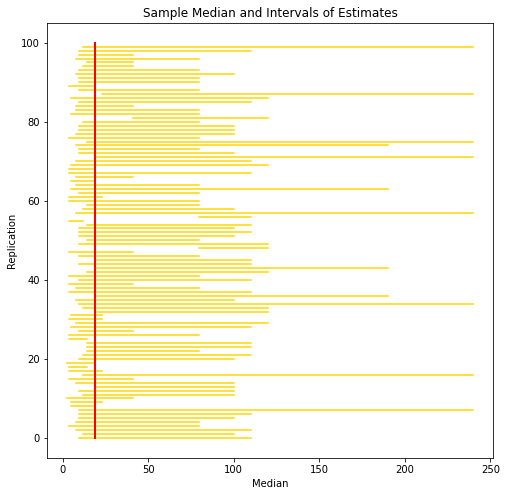

In [16]:
matplotlib.pyplot.figure(figsize=(8,8))
for i in range(100):
    x = []
    y = []
    x.append(left_ends[i])
    x.append(right_ends[i])
    y.append(i)
    y.append(i)
    matplotlib.pyplot.plot(x, y,color="gold")
x = []
y = []
x.append(numpy.percentile(arsenic_list,50.0))
x.append(numpy.percentile(arsenic_list,50.0))
y.append(0)
y.append(100)
matplotlib.pyplot.plot(x, y, color='red', lw=2)
matplotlib.pyplot.xlabel('Median')
matplotlib.pyplot.ylabel('Replication')
matplotlib.pyplot.title('Sample Median and Intervals of Estimates');